## Seleção de Patch de Maneira Dinâmica

In [1]:
from PIL import Image
import numpy as np
import random
random.seed(10)
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
# Realizando abertura da imagem com a bib PILLOW
path_image = "../data/base_recortada/ASC-H/10.png"
im = Image.open(path_image)
im.format, im.size, im.mode

('PNG', (180, 180), 'RGB')

In [3]:
# im = im.rotate(45)

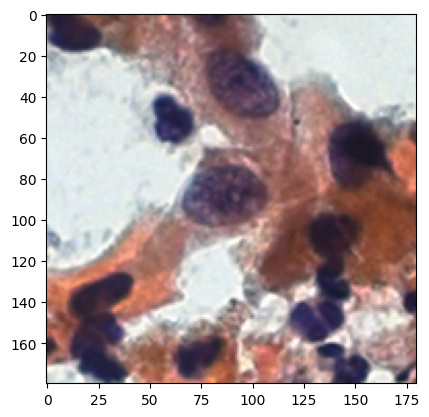

In [4]:
plt.imshow(im)
plt.show()

### Normal Pixels

In [6]:
def visualize_patch_centers(image, centers, patch_size):
    # cria o ax para plotar a img
    fig, ax = plt.subplots(1)
    
    # convert para np
    image_np = np.array(image)
    
    # normaliza a img para intervalo de 0 e 1
    if image_np.max() > 1:
        image_np = image_np / 255.0
    
    ax.imshow(image_np)
    
    patch_height, patch_width = patch_size
    
    for (h, w) in centers:
        rect = patches.Rectangle(
            (w - patch_width // 2, h - patch_height // 2), 
            patch_width, patch_height,
            linewidth=1, edgecolor='red', facecolor='none'
        )
        ax.add_patch(rect)
        plt.plot(w, h, marker='v', color='r')
    
    # Ajusta limite das imagens para proporcao correta
    ax.set_xlim([0, image_np.shape[1]])
    ax.set_ylim([image_np.shape[0], 0])
    
    plt.show()

196
(8, 8)


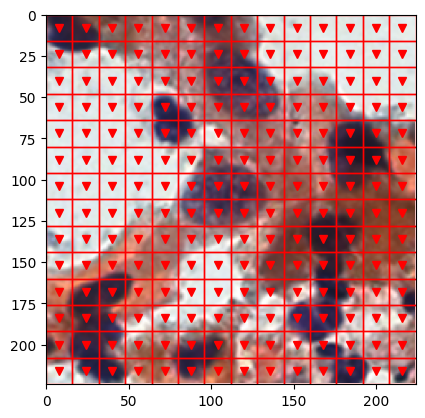

In [6]:
def generate_patch_centers(image_height, image_width, patch_size):
  
    # Stride é o espacamento entre os patches que é o próprio patch_size
    stride = patch_size  
    
    # Qtd de patches na height e no widget (SEM SOBREPOSICAO)
    num_patches_h = image_height // stride
    num_patches_w = image_width // stride
    
    centers_h = []
    centers_w = []
    
    # Todos os patches da coluna
    for i in range(num_patches_h):
      centers_h.append((i * stride + stride // 2))
    
    # Todos os patches da largura
    for j in range(num_patches_w):
      centers_w.append((j * stride + stride // 2))
    
    centers = []
    # Calculando a combinação das posicoes dos patches (X,Y)
    for h in centers_h:
      for w in centers_w:
        centers.append((h,w))
    
    # Retornar os pixels centrais
    return centers

# Variaveis
patch_size = 16
    
# Realizando resize na imagem com a bib PIL para 224x224
resized_image = im.resize((224,224))
centers = generate_patch_centers(224, 224, patch_size)
print(len(centers))
print(centers[0])

# Printa a visualizacao da imagem
visualize_patch_centers(resized_image, centers, (patch_size, patch_size))

-----

### Random Pixels

In [7]:
def generate_random_patch_centers(image_height, image_width, patch_size, num_patches):
    patch_height, patch_width = patch_size
    
    centers = []
    for _ in range(num_patches):
        h = random.uniform(patch_height / 2, image_height - patch_height / 2)
        w = random.uniform(patch_width / 2, image_width - patch_width / 2)
        centers.append((h, w))

    return centers

196
[(126.851739695502, 97.20892337242384), (128.24299063596985, 50.86843228501636), (177.17082028232255, 179.30648548695666), (143.92228705144456, 41.32774775591449), (116.29922680510431, 76.17674481739537), (59.99930875077128, 206.18591710234963), (215.28385444820668, 17.267727549690072), (186.91349575554852, 133.46364708138248), (87.37404507117651, 66.99258932459675), (148.39268820407085, 103.02087942012757), (150.6591889787157, 145.66403457088904), (35.659454100140266, 167.71026530035004), (212.3419557943277, 209.63273736422312), (135.57197867371548, 17.206211635841147), (8.843469984948753, 35.86628562621985), (203.72847245033347, 70.99499690204703), (84.1582851453687, 194.82481886415118), (73.38767143094174, 122.18829427458034), (98.69443918581743, 21.51878863438491), (129.58561494600147, 183.56612271367564), (40.53513502458053, 54.65418548669663), (93.87700320468687, 15.680372764194836), (111.29352771224202, 178.14043580136342), (144.8413152618947, 118.9646170157766), (185.866154

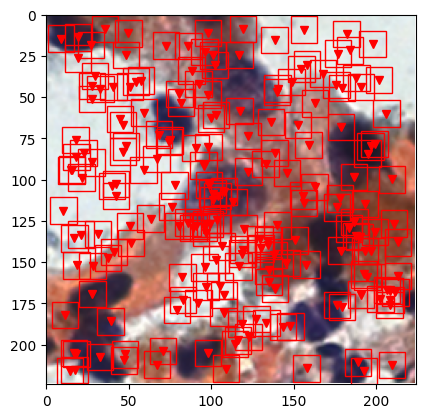

In [8]:
image_height = 224
image_width = 224
patch_size = (16, 16)
num_patches = 196
resized_image = im.resize((224,224))

patch_centers = generate_random_patch_centers(image_height, image_width, patch_size, num_patches)

# patch_centers = patch_centers[0:2]

print(len(patch_centers))
print(patch_centers)
visualize_patch_centers(resized_image, patch_centers, (16, 16))

---

### Random Pixels (Melhorado)

In [ ]:
def pixels_adj(matriz, x, y, n_voltas):
    coords_voltas = []
    n_linhas, n_colunas = matriz.shape
    
    for volta in range(1, n_voltas + 1):
        for i in range(-volta, volta + 1):
            if 0 <= y + i < n_linhas:
                if 0 <= x - volta < n_colunas:
                    coords_voltas.append((y + i, x - volta))
                if 0 <= x + volta < n_colunas:
                    coords_voltas.append((y + i, x + volta))
        
        for j in range(-volta + 1, volta):
            if 0 <= x + j < n_colunas:
                if 0 <= y - volta < n_linhas:
                    coords_voltas.append((y - volta, x + j))
                if 0 <= y + volta < n_linhas:
                    coords_voltas.append((y + volta, x + j))
    coords_voltas.append((y,x))
    return coords_voltas

def verificar_adj(matriz, x, y, lista_centros):
    x, y = int(round(x)), int(round(y))  # Converta para inteiros
    if len(lista_centros) == 0:
        return False
    else:
        for each in lista_centros:
            each_x, each_y = int(round(each[1])), int(round(each[0]))
            ret = pixels_adj(matriz=matriz, x=each_x, y=each_y, n_voltas=8)
            if (y, x) in ret:  # Verifique na ordem correta
                return True
    return False

def random_patchs_melhorados(image_height, image_width, patch_size, num_patches, img_PIL):
    patch_height, patch_width = patch_size
    
    img_gray = img_PIL.convert('L')
    img_mtx = np.array(img_gray)
    
    centers = []
    
    for _ in range(num_patches):
        h = random.uniform(patch_height / 2, image_height - patch_height / 2)
        w = random.uniform(patch_width / 2, image_width - patch_width / 2)
        
        
        check = verificar_adj(img_mtx, w, h, centers)
        
        while check:
            h = random.uniform(patch_height / 2, image_height - patch_height / 2)
            w = random.uniform(patch_width / 2, image_width - patch_width / 2)
            check = verificar_adj(img_mtx, w, h, centers)
        
        centers.append((h, w))
    
    return centers

# Uso do código
image_height = 224
image_width = 224
patch_size = (16, 16)
num_patches = 196
imagem_rgb = im.convert('RGB')
resized_image = imagem_rgb.resize((224, 224))

patch_centers = random_patchs_melhorados(image_height, image_width, patch_size, num_patches, resized_image)

print(len(patch_centers))
print(patch_centers)
visualize_patch_centers(resized_image, patch_centers, (16, 16))

### Geração dos centros pré-treinamento

In [3]:
import random
import numpy as np
import cv2
from PIL import Image

####################################
# Random Pixels Melhorado
####################################
def pixels_adj( matriz, x, y, n_voltas):
  coords_voltas = []
  n_linhas, n_colunas = matriz.shape
  
  for volta in range(1, n_voltas + 1):
      for i in range(-volta, volta + 1):
          if 0 <= y + i < n_linhas:
              if 0 <= x - volta < n_colunas:
                  coords_voltas.append((y + i, x - volta))
              if 0 <= x + volta < n_colunas:
                  coords_voltas.append((y + i, x + volta))
      
      for j in range(-volta + 1, volta):
          if 0 <= x + j < n_colunas:
              if 0 <= y - volta < n_linhas:
                  coords_voltas.append((y - volta, x + j))
              if 0 <= y + volta < n_linhas:
                  coords_voltas.append((y + volta, x + j))
  coords_voltas.append((y,x))
  return coords_voltas

def verificar_adj(matriz, x, y, lista_centros):
    x, y = int(round(x)), int(round(y))
    if len(lista_centros) == 0:
        return False
    else:
        for each in lista_centros:
            each_x, each_y = int(round(each[1])), int(round(each[0]))
            ret = pixels_adj(matriz=matriz, x=each_x, y=each_y, n_voltas=8)
            if (y, x) in ret:  
                return True
    return False

def random_patchs_melhorados( patch_size, num_patches, imagem_tensor):
  
    img_PIL = Image.fromarray((imagem_tensor.permute(1, 2, 0).cpu().numpy() * 255).astype(np.uint8))

    image_height, image_width = img_PIL.size
    
    patch_height, patch_width = patch_size
    
    img_gray = img_PIL.convert('L')
    img_mtx = np.array(img_gray)
    
    centers = []
    
    for _ in range(num_patches):
        h = random.uniform(patch_height / 2, image_height - patch_height / 2)
        w = random.uniform(patch_width / 2, image_width - patch_width / 2)
        
        
        check = verificar_adj(img_mtx, w, h, centers)
        
        while check:
            h = random.uniform(patch_height / 2, image_height - patch_height / 2)
            w = random.uniform(patch_width / 2, image_width - patch_width / 2)
            check = verificar_adj(img_mtx, w, h, centers)
        
        centers.append((h, w))
    
    print(len(centers))
    
    return centers

In [4]:
import hashlib

def gerar_hash_tensor(tensor):
    """
    Gera um hash único para um tensor.

    Parâmetros:
    tensor (torch.Tensor): O tensor para o qual o hash será gerado.

    Retorna:
    str: Um hash hexadecimal representando o tensor.
    """
    # Certifica-se de que o tensor está no formato apropriado (NumPy)
    tensor_numpy = tensor.detach().cpu().numpy()
    
    # Converte o tensor em bytes
    tensor_bytes = tensor_numpy.tobytes()
    
    # Gera o hash usando SHA-256
    hash_unico = hashlib.sha256(tensor_bytes).hexdigest()
    
    return hash_unico

196
196
[(144.6107429921746, 122.88799669418897), (172.02192094810266, 150.99825861567405), (29.555706758355814, 93.30638081058818), (185.5218583258546, 95.622007928616), (172.02145340433455, 183.67500839030987), (77.27559745692034, 112.48419103769214), (127.49742694540925, 18.33652530248127), (98.99105364750153, 111.98966424821018), (40.860666353788545, 88.48339777018894), (23.93415026947563, 209.3816185577867), (37.126730095731695, 157.3967663855081), (63.54552454455283, 211.99287199440502), (187.07519279373676, 118.6766089619315), (58.56561204057982, 27.78512604408879), (96.71865278640344, 77.7037554750135), (52.432977551063374, 200.51894365198117), (136.18082685846778, 32.41450721797312), (172.81059358804993, 127.33646291838298), (11.567540859840806, 118.4895218583678), (107.91083804680994, 62.2625084926889), (98.77678090985063, 62.21826743291125), (35.56533790791661, 69.76389784318624), (214.7033219611066, 20.638186454577948), (126.89115271125067, 178.3916567316667), (156.05638609

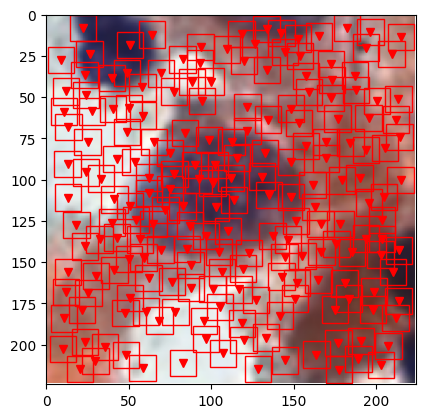

In [7]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision.transforms import v2
import pickle
import numpy as np

pickle_file = "../data/centros_pre_salvos/randomico_melhorado.pkl"

img_size = (224, 224)
batch_size = 32

transform = v2.Compose([
    v2.Resize(img_size),
    v2.ToTensor(),
])

dataset = ImageFolder(root="../data/base_recortada/", transform=transform)


# lista_centro_dict = []

centros_dict = {}

# Iteração sobre as imagens do dataset
for img_idx in range(len(dataset)):
    image, label = dataset[img_idx]  # Carrega a imagem e o rótulo

    centers = random_patchs_melhorados( patch_size=(16,16), num_patches=196, imagem_tensor=image)
    
    
    centros_dict[gerar_hash_tensor(image)] = centers
    
    
    # im = Image.fromarray((image.permute(1, 2, 0).cpu().numpy() * 255).astype(np.uint8))
    
    # imagem_rgb = im.convert('RGB')
    # resized_image = imagem_rgb.resize((224, 224))

    # print(len(centers))
    # print(centers)
    # visualize_patch_centers(resized_image, centers, (16, 16))

# Salvando o dicionário em um arquivo pickle
with open(pickle_file, 'wb') as f:
    pickle.dump(centros_dict, f)

# print(f"Centros dos patches salvos em {pickle_file}")

In [33]:
with open('../data/centros_pre_salvos/randomico_melhorado.pkl', 'rb') as f:
        testando  = pickle.load(f)
        

In [34]:
len(testando)

43

In [35]:
testando

{'a2af8c70bf25f20ba9dfc5065c981f2d221f6f3eb125db2483599e09d1bf8575': [(91.45420814502222,
   65.20832400832381),
  (14.095469157535204, 130.6026239868358),
  (79.11762607178169, 122.8051516094567),
  (15.74170175900322, 169.0138276526545),
  (21.53140321489603, 106.46159906765496),
  (87.86722761815415, 94.18039623857271),
  (61.47693094418775, 123.44237382823613),
  (19.851009139904576, 190.89995495262747),
  (106.41269086751988, 36.7682450775544),
  (45.81350790363518, 87.77769777320175),
  (213.81342333838575, 14.040269457955704),
  (207.03730633909353, 120.16781569816699),
  (155.78890380911176, 131.82743404207653),
  (15.010654037767777, 82.61357107556064),
  (27.336332821781582, 206.71851918814642),
  (63.11112836633026, 20.561585285137745),
  (98.66532724774642, 145.08107139010428),
  (181.27323895676022, 44.49090174466633),
  (57.058509630942815, 39.502983785972404),
  (21.256793221293123, 19.272881386541115),
  (173.39874320337398, 60.69565732719134),
  (46.683383528975924, 18

In [37]:
image_path = '../data/base_recortada/Negative for intraepithelial lesion/530.png'  # Altere para o caminho da sua imagem

# Carrega a imagem usando PIL
image = Image.open(image_path)

# Define as transformações (opcional, mas comum em tarefas de visão computacional)
transform = v2.Compose([
    v2.Resize((224, 224)),  # Redimensiona a imagem
    v2.ToTensor(),           # Converte a imagem para um tensor
])

# Aplica as transformações
image_tensor = transform(image)

hash_find = gerar_hash_tensor(image_tensor)

# Exibe informações sobre o tensor
print("Shape do tensor da imagem:", image_tensor.shape) 
print("Hash gerado: ", hash_find)

Shape do tensor da imagem: torch.Size([3, 224, 224])
Hash gerado:  488a3e1d689b7625763f3acd531fff354d8ee6fe0824fea625fe20d0dd12b178


d:\AREA_DE_TRABALHO\Faculdade_8_Periodo\TCC\VIT-cric\vit-dynamic-patches\env\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [38]:
testando[hash_find]

[(102.1907880257719, 119.30790016570916),
 (205.3080490651346, 25.728510125049983),
 (112.87006546039834, 146.4517243549747),
 (70.84467167711162, 161.37123450567023),
 (84.79151297628167, 145.9016023127854),
 (160.7828383245573, 144.82256677038075),
 (39.87348932999595, 11.170280220377759),
 (73.59875741846209, 37.392486465387385),
 (16.77136047669177, 82.99265070391648),
 (95.36756381657062, 90.24667338664392),
 (213.50299850875464, 147.38832525173953),
 (21.677446073374973, 165.6019479306981),
 (49.81962381144784, 174.3191648848385),
 (64.03316753628214, 177.10565507481616),
 (147.05606113215512, 151.4668747229801),
 (180.86861695120785, 97.34132288097777),
 (121.47658639924187, 121.18727514625382),
 (184.14504030262725, 107.39841835243749),
 (74.95907128353855, 69.43478122516018),
 (22.572929348828367, 123.20326720673933),
 (99.26767030017048, 72.85965018270872),
 (11.108138868156693, 167.91007134970283),
 (112.3403166876931, 117.93906270473227),
 (40.426649165469144, 158.999907745